# My first automatic Jupyter Notebook : MyApp
This is an auto-generated notebook.

## Selection of data
classes selected: 
[class : 0 number of elements : 100, class : 1 number of elements : 200]

In [86]:
import os
import numpy as np
from PIL import Image

In [104]:
X = []
Y = []
classes = ['0', '1']
classes_count = {'0': 2000, '1': 2000}
for class_ in classes:
	count = 0
	for file in os.listdir(f'../input_data/' + class_):
		if count == classes_count[class_]:
			break
		X.append(np.array(Image.open(f'../input_data/' + class_ + '/' + file)))
		Y.append(class_)
		count += 1
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(4000, 28, 28)
(4000,)


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Preprocessing of data

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

## Transformation of data

### Flattening of data

In [107]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(3200, 784)
(800, 784)


### Normalization of data

In [108]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape)
print(X_test.shape)

(3200, 784)
(800, 784)


## Data Mining

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Classifier : Classifier

Creating the model

In [110]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dense_29 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 402,946
Trainable params: 402,946
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [111]:
model_history = model.fit(X_train, Y_train)
score = model.evaluate(X_test, Y_test)
print("Accuracy : ", score[1])


25/25 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9975
Accuracy :  0.9975000023841858


dict_keys(['loss', 'accuracy'])


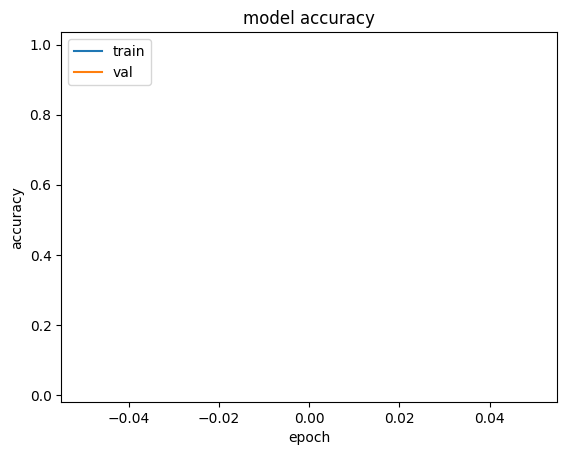

In [112]:
import matplotlib.pyplot as plt
print(model_history.history.keys())
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()